# 1. Procesamiento de la base de datos

* Instalar paquetes

In [351]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import tree

from sklearn.model_selection import train_test_split,  KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## 1.1 Dataset propuesto

*  En esta práctica se utiliza un set de datos públicos en UCI "Bank Marketing" (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

* En particular, se utiliza el archivo 'bank-additional-full.csv' que contienen 41.188 registros para más de 20 atributos.

* Consideraremos como variable Y a la variable categórica y: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no"). En este sentido, intentaremos explicar la probabilidad que un cliente suscriba un depósito a plazo.

* Para el conjunto X (atributos que explican a Y), consideraremos al resto de atributos del data set.

### 1.1.1 Importar 

* Importamos el archivo 'bank-additional-full.csv' y describimos todos los atributos.

In [352]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

df.describe(include='all')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


* Podemos observar que el dataset contiene 21 variable.

* De acuerdo, con la descripsión del data set, estas variables tienen la siguiente descripción.

- 1 - age (numérico)
- 2 - job: tipo de trabajo (categórico: "administrativo", "obrero", "empresario", "empleado doméstico", - "directivo", "jubilado", "autónomo", "servicios", "estudiante", "técnico", "desempleado", "desconocido")
- 3 - marital: estado civil (categórico: "divorciado", "casado", "soltero", "desconocido"; nota: "divorciado" - significa divorciado o viudo)
- 4 - education (categórica: "básica.4", "básica.6", "básica.9", "bachillerato", "analfabeto", "curso.profesional", "título.universitario", "desconocido")
- 5 - default: ¿tiene un crédito en mora? (categórico: "no", "sí", "desconocido")
- 6 - housing: ¿tiene préstamo para la vivienda? (categórico: "no", "sí", "desconocido")
- 7 - loan: ¿tiene préstamo personal? (categórico: "no", "sí", "desconocido")
- 8 - contact: tipo de comunicación del contacto (categórico: "celular", "teléfono") 
- 9 - month: mes del año del último contacto (categórico: "ene", "feb", "mar", ..., "nov", "dec")
- 10 - day_of_week: día de la semana del último contacto (categórico: "mon", "tue", "wed", "thu", "fri")
- 11 - duration: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si la duración=0 entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después de la finalización de la llamada y es obviamente conocido. Por lo tanto, esta entrada sólo debería incluirse a efectos de referencia y debería descartarse si se pretende tener un modelo de predicción realista.
- 12 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
- 13 - pdays: número de días transcurridos desde que se contactó por última vez con el cliente en una campaña anterior (numérico; 999 significa que no se contactó con el cliente previamente)
- 14 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
- 15 - poutcome: resultado de la campaña de marketing anterior (categórico: "fracaso", "inexistente", "éxito"
- 16 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
- 17 - cons.price.idx: índice de precios al consumo - indicador mensual (numérico)     
- 18 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)     
- 19 - euribor3m: índice euribor a 3 meses - indicador diario (numérico)
- 20 - nr.employed: número de empleados - indicador trimestral (numérico)
- 21 - y: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")

### 1.1.2 Filtrado, limpieza y depuración

- Verificamos a continuación  si los tipos de variables son consistentes.

In [353]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

- Es necesario convertir los tipos object a categoricos, de acuerdo con la definición del set de datos.

In [354]:
name_cat=['job', 'marital', 'education', 'default', 'housing', 'loan', \
    'contact', 'month', 'day_of_week', 'poutcome', 'y']
for cat in name_cat:
    df[cat]=df[cat].astype('category')
df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

* Verificamos si existen valores NaN.

In [355]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* No existe valores NaN, sin embargo, de acuerdo con la descripcción de datos, este tipo valores estan registrados como 'unkown' (desconocido) para las variables categoricas.
* Por lo tanto, a continuación filtramos los valores 'unknown' del data set.

In [356]:
for cat in name_cat:
    df=df[df[cat]!= 'unknown']
df.shape

(30488, 21)

* Como consecuencia, el data set se reduce de 41.188 registros a 30.488 registros.

* A continuación se observa que los atributos categóricos no contienen valores 'unkown'.

In [357]:
for cat in name_cat:
    print(f"unkowns para {cat}:{df.loc[df[cat]=='unkown'].shape[0]}")

unkowns para job:0
unkowns para marital:0
unkowns para education:0
unkowns para default:0
unkowns para housing:0
unkowns para loan:0
unkowns para contact:0
unkowns para month:0
unkowns para day_of_week:0
unkowns para poutcome:0
unkowns para y:0


* Un vez el data set ha sido depurado, creamos una copia del mismo llamado 'df2'.

In [358]:
df2=df.copy()

### 1.1.3 Homogenización y agrupación del data set

- A continuación procedemos a utilizar labelencoder en las variables categóricas para que puedan ser utilizadas en el análisis posterior. Esto significa darles un valor numérico.

In [359]:
col_names=df2.columns
num_names=df2._get_numeric_data().columns
col_enc = list(set(col_names)-set(num_names))
col_enc
for x in col_enc:
    lbl = LabelEncoder()
    df2[x]=lbl.fit_transform(df2[x])
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


* Consideraremos como variable 'y' a la variable categórica 'y': ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no"). En este sentido, intentaremos explicar la probabilidad que un cliente suscriba un depósito a plazo.

* Para el conjunto X (atributos que explican a Y), consideraremos al resto de atributos del data set. Para este set, aplicaremos a todos los atributos una transformación StandardScaler, que consta en restar por la media y dividir entre la desviación estándar de cada atributo.

In [360]:
scaler = StandardScaler()
X=df2.iloc[:,range(len(df2.columns)-1)]
y=df2['y'].values
print(scaler.fit(X)) # funcion standard scale
X=scaler.transform(X)

StandardScaler()


* Finalmente, se selecciona aleatoriamente el 70% training y 30% testing para los posteriores ejercicios.


In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


# 2. Aplicación de algoritmos

## 2.1 Aplicación de algoritmo KNN

- En primera instancia, para encontrar el mejor modelo KNN que se ajuste a los datos realizamos una busqueda de parámetros desde k={5,10,15,20,25,30}, tal que nos permita encontrar un valor de k que nos de el mejor nivel de accuracy.

In [362]:
err = []
for i in [5,10,15,20,30,40]:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',algorithm='kd_tree',p=1)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    err.append(metrics.accuracy_score(y_test, y_pred_i)*100)

- De acuerdo con la figura que se muestra a continuación, el modelo KNN que mejor tiene mejor predicción es el que considera 40 vecinos (k=40) Por tanto, se concluye que se debe utilizar el modelo KNN=1 para la parte de evaluación.

Mejor k = 3  Acurracy= 89.155


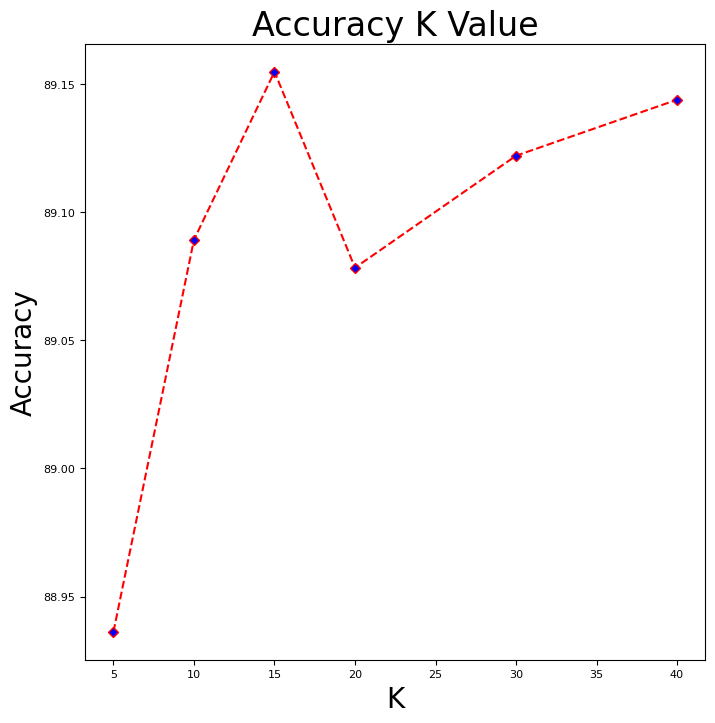

In [363]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 

ax.plot([5,10,15,20,30,40], err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Accuracy K Value',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
k_optimo = np.where(err==np.max(err))[0][0]+1
print('Mejor k =',k_optimo,' Acurracy=',round(np.max(err),3))
MSE_knn_test=round(np.max(err),3)

## 2.2 Aplicación de algoritmo Random Forest

- Procedemos de buscar el modelo de random Forest que tenga el menor accuracy de acuerdo con tres sets de parámetros mtre=100,200,500,1000.

In [364]:
err = []

for i in [100,200,500,1000]:
    clf = RandomForestClassifier(n_estimators=i,random_state=12345)
    clf.fit(X_train,y_train)
    y_pred_i = clf.predict(X_test)
    err.append(metrics.accuracy_score(y_test, y_pred_i)*100)

- A continuación procedemos a graficar los resultados de los distintos modelos con su respectivo accuracy score.

- De acuerdo con los resultados, el mejor modelo random forest es el que tiene 500 árboles.

Mejor tree número= 3  Accuracy= 90.532


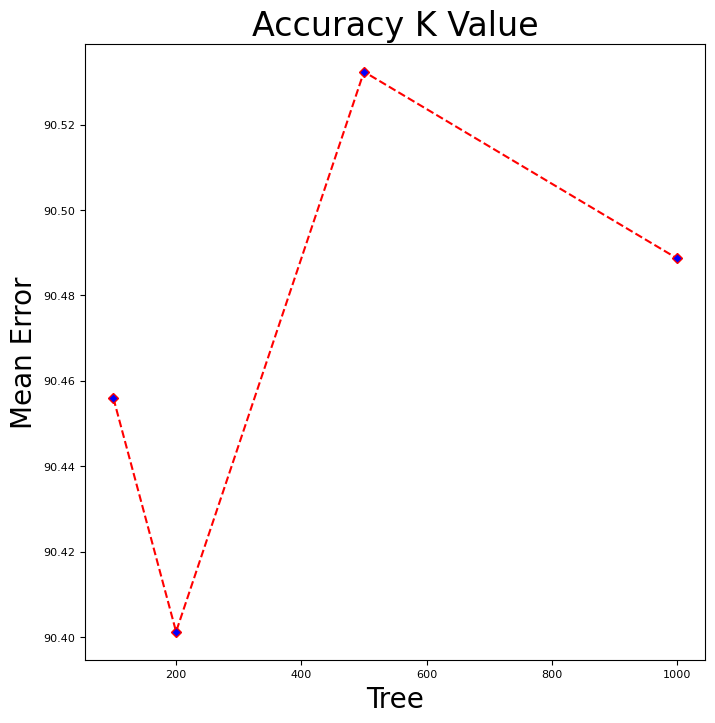

In [365]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot() 

ax.plot([100,200,500,1000], err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Accuracy K Value',fontsize=24)
ax.set_xlabel('Tree',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)
k_optimo = np.where(err==np.max(err))[0][0]+1
print('Mejor tree número=',k_optimo,' Accuracy=',round(np.max(err),3))
MSE_rf_test=round(np.max(err),3)

# 3. Evaluación

* Utilizamos un modelo de entrenamiento de tipo Hold out. Es decir, que como explicamos anteriormente utilizamos el 70% training y 30% testing para los posteriores ejercicios.

* Asimismo, utilizamos el mejor modelo de knn (k=40) y random forest (500 árboles), para ver cual es el modelo que arroja la mejor predicicón.

* De acuerdo, con estos resultados observamos que el RF (òptimo) tiene una mejor predicción que el KNN (óptimo).



In [366]:
# Mejor modelo knn
knn = KNeighborsClassifier(n_neighbors=40, weights='distance',algorithm='kd_tree',p=1)
knn.fit(X_train,y_train)
# Mejor modelo RF
clf = RandomForestClassifier(n_estimators=500,random_state=12345)
clf.fit(X_train,y_train)

print('Accuracy Random Forest : %0.3f' % (accuracy_score(y_test, clf.predict(X_test), normalize=True)*100),'%')
print('Accuracy KNN: %0.3f' % (accuracy_score(y_test, knn.predict(X_test), normalize=True)*100),'%')

Accuracy Random Forest : 90.532 %
Accuracy KNN: 89.144 %



* A continuación, procedemos a evaluar la precición de nuestra clasificación: 1: tiene depósito a plazo fijo vs 0 no tiene depósito a plazo fijo.

* De acuerdo con los resultados observamos lo siguiente:ç

    * Precición: La presición de no tener depósito (0) es más alta que tener depósito (0).
    * Recall: Nos dice que el 98% de los casos iguales a 0 fueron clasificados de manera correcta, versus que solo un 34% para casos iguales a 1.
    * f1-score: que nos resume las estadísticas de recall y precision nos dice que en general, el valor de 0 (sin cuenta de depósito) es predecido mejor que 1 (sí tiene cuenta depósito).

In [367]:
target_names = ['ph{0}'.format(i) for i in df2['y'].unique()]
print(f"KNN: {classification_report(y_test, knn.predict(X_test), target_names=target_names)}\n \
    Random Forest: {classification_report(y_test, knn.predict(X_test), target_names=target_names)}")

KNN:               precision    recall  f1-score   support

         ph0       0.90      0.98      0.94      7992
         ph1       0.67      0.27      0.39      1155

    accuracy                           0.89      9147
   macro avg       0.79      0.63      0.66      9147
weighted avg       0.87      0.89      0.87      9147

     Random Forest:               precision    recall  f1-score   support

         ph0       0.90      0.98      0.94      7992
         ph1       0.67      0.27      0.39      1155

    accuracy                           0.89      9147
   macro avg       0.79      0.63      0.66      9147
weighted avg       0.87      0.89      0.87      9147



# 4. Visualización de resultados

# 4.1 Matrix de confusión

* La matriz de confusión permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

* Primero calculamos la matriz de confución para KNN óptimo. De acuerdo con los resultados observamos los siguiente:

    * El 98% (7869) de los casos igual a 0 (no tiene cuenta de depósito) son correctamente clasificados. El 2% de estos no son correctamento clasificados.
    * El 32% (319) de los casos igual a 1 (tiene cuenta de depósito) son correctamente clasificados. El 58% no son correctamente clasificados.


/Users/ignaciogarronvedia/opt/anaconda3/envs/python_bd/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de confusión
[[7840  152]
 [ 841  314]]


/Users/ignaciogarronvedia/opt/anaconda3/envs/python_bd/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de confusión normalizada
[[1.  0. ]
 [0.7 0.3]]


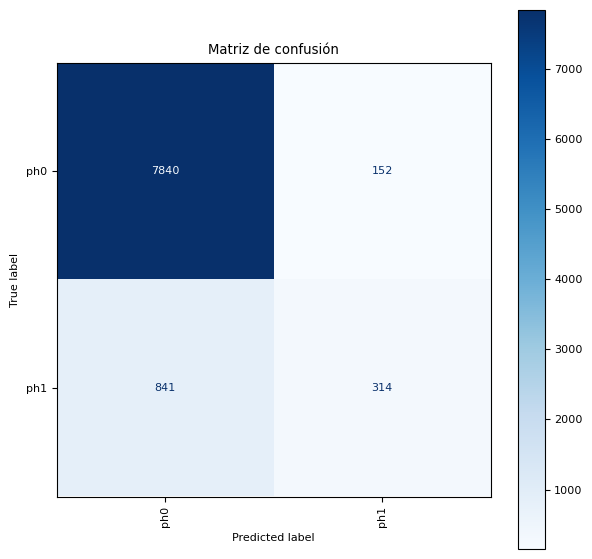

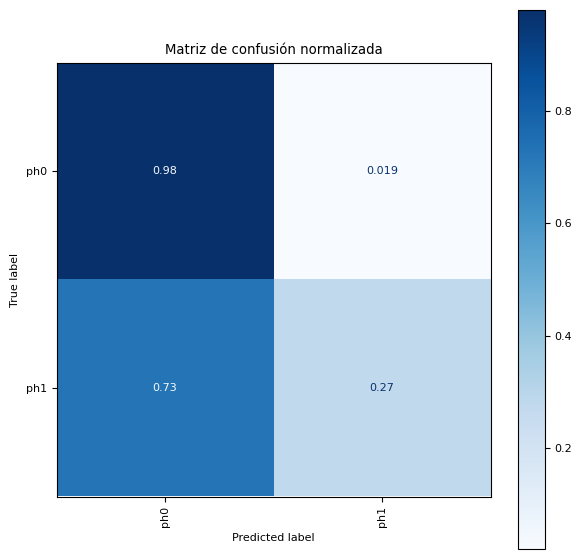

In [368]:
np.set_printoptions(precision=1)

plt.rcParams.update({'font.size': 8})
titles_ = [("Matriz de confusión", None),("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_:
    fig, ax = plt.subplots(figsize=(7,7))
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 xticks_rotation='vertical',
                                 ax=ax)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


* Segundo, calculamos la matriz de confución para Random Forest óptimo. De acuerdo con los resultados observamos los siguiente:

    * El 96% (7697) de los casos igual a 0 (no tiene cuenta de depósito) son correctamente clasificados. El 4% de estos no son correctamento clasificados.
    * El 54% (606) de los casos igual a 1 (tiene cuenta de depósito) son correctamente clasificados. El 46% no son correctamente clasificados.

/Users/ignaciogarronvedia/opt/anaconda3/envs/python_bd/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de confusión
[[7677  315]
 [ 551  604]]


/Users/ignaciogarronvedia/opt/anaconda3/envs/python_bd/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Matriz de confusión normalizada
[[1.  0. ]
 [0.5 0.5]]


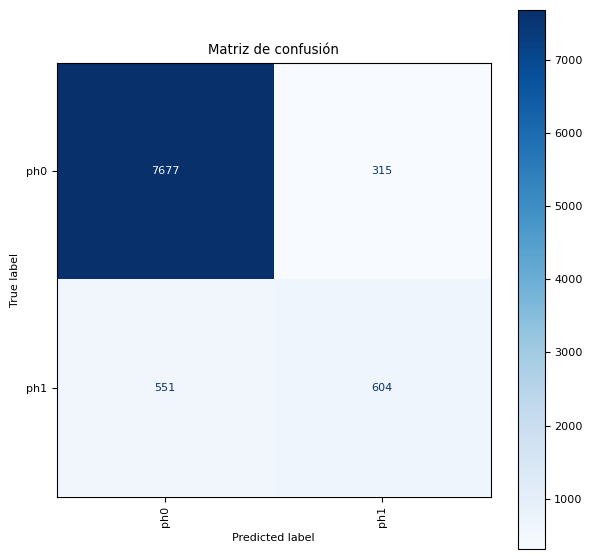

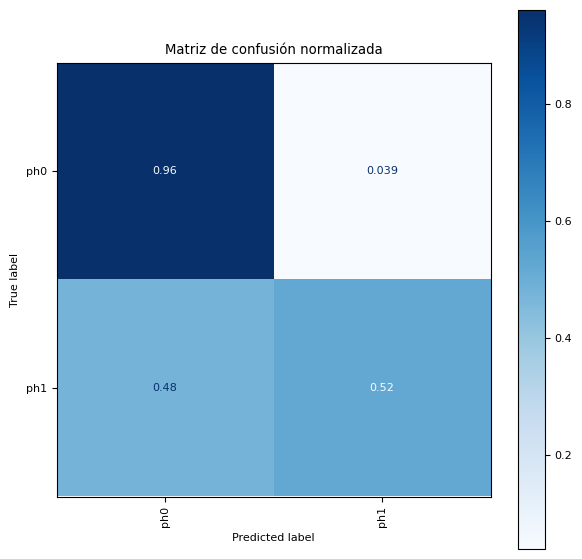

In [369]:
np.set_printoptions(precision=1)

plt.rcParams.update({'font.size': 8})
titles_ = [("Matriz de confusión", None),("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_:
    fig, ax = plt.subplots(figsize=(7,7))
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 xticks_rotation='vertical',
                                 ax=ax)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


# 5. Análisis general de resultados

* En este trabajo se aplicaron 2 algoritmos, KNN y Random Forest, para clasificar la tenencia de una cuenta de depósito a plazo en un banco.

* Para este fin, se realizaron las siguientes actividades:

    * Primero, se filtro, limpió, depuró la base de datos.

    * Segundo, se aplicaron una serie de parámetros para buscar los mejores modelos de KNN y Random Forest.

    * Tercero, se calcularon los test de accuracy, F1,score y recall para un modelo de entrenamiento hold out.

    * Cuarto, se analizaron los resultados gráficos de la matriz de confusión de ambos modelos.

* Los resultados de este modelo sugiere que el modelo de Random Forest es más adecuado que KNN, debido principalmente a que tiene una mejor capacidad de predecir los valores 1 (tiene cuenta bancaria) de acuerdo con los test accuracy, F1-score y Recall. Esta diferencia es sustancial cuando se observa la matriz de confusión, donde random forest puede predecir adecuadamente el 54% de los casos igual a 1, versus el KNN que solo logra una predicción adecuada de 28% para este grupo.

* En conclusión, se sugiere la utilización de Random Forest para este estudio.